<a href="https://colab.research.google.com/github/sitthatkaja/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis


In [1]:
import pandas as pd

In [2]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv')

In [3]:
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


#**Factor Analysis**

**Assumptions :**

ในข้อมูล multivariale ที่มีตัวแปร observe variable จำนวน n ตัว

มีตัวแปร Factor (Latent  Variables) จำนวน k ตัวที่สามารถอธิบายข้อมูลทั้งหมดได้ 

โดย k < n





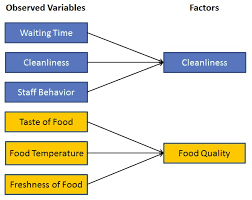

## **Assumptions ในการทำ Factor analysis**

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be perfect ***multicollinearity***.

* There should not be ***homoscedasticity*** between the variables.

***
## **การทำ Factor Analysis**

In [4]:
!pip install factor_analyzer
##แก้ Error ด้วยการ install
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt 
## เหมือนกับ from matplotlib import pyplot as plt

     |████████████████████████████████| 40kB 2.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=0009cdfdb7d5f408b974585c29a2596226a332d2d585354a7864b699d0cf776b
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,...,o5,o6

In [5]:
BFI_data.shape

(2800, 29)

In [6]:
BFI_data_dropped = BFI_data.iloc[:,1:26]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


30 มีนาคม 2564

In [7]:
BFI_data_dropped = BFI_data_dropped.dropna()
BFI_data_dropped.shape

(2436, 25)

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)
chi_square_value, p_value

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

## **Kaiser-Meyer-Olkin (KMO) Test**

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่จะนำไปใช้ใน Factor Analysis

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model

0.8485397221949221

##Factor Analysis

## Import

In [10]:
from factor_analyzer import FactorAnalyzer

### Define

In [11]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [12]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [13]:
data_fa.shape

(2436, 20)

วิธีตัดสินว่าจะลดเหลือกี่ dimension ( มี factors ทั้งหมดกี่ตัว )

In [14]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values 

In [15]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Scree plot

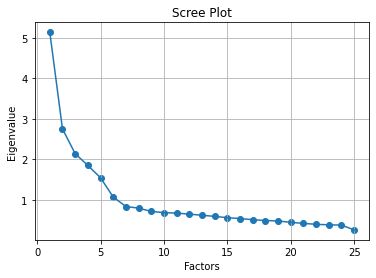

In [16]:
# Create scree plot using matplotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


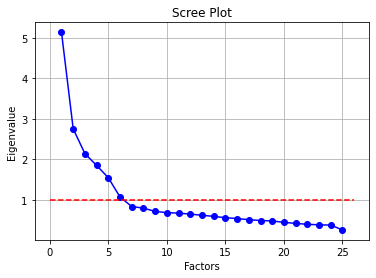

In [17]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [18]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

### Factor loading

In [19]:
fa.loadings_.shape

(25, 20)

In [20]:
fa.loadings_

array([[ 4.39221644e-02, -7.23791989e-03, -3.54953863e-02,
         6.36904232e-02,  1.86674726e-02,  7.56067826e-01,
         3.79571050e-02,  6.18021132e-02, -1.21231838e-03,
         4.98167814e-02, -2.38173505e-02,  4.66514142e-02,
         4.62005355e-02,  3.02085508e-02, -1.17663825e-01,
         1.13469789e-02, -6.77496110e-03, -4.75707513e-02,
         3.80305889e-02, -1.32410506e-05],
       [-3.61660798e-02, -7.05831938e-02,  2.60349595e-02,
         3.14887147e-02,  1.39800152e-02, -3.53463277e-01,
         4.64083497e-02,  8.38715235e-02,  9.55513114e-02,
         8.65737514e-02,  5.62178309e-02,  9.13535039e-02,
         3.71647110e-02,  5.18919280e-02, -6.40070765e-02,
         2.44624623e-02, -5.05741873e-02, -7.11741066e-02,
         3.32392439e-02, -1.03131820e-01],
       [ 1.25240910e-01,  6.35958266e-02,  5.74261728e-01,
         5.81639394e-02,  4.81248438e-02, -2.30739166e-01,
         2.24828463e-02,  4.31813917e-02, -1.31675268e-01,
         9.04356027e-02, -8.5

## รัน Factor Analyzer อีกรอบด้วย parameters จำนวน factor เท่ากับ 6

In [21]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [22]:
fa2.loadings_.shape

(25, 6)

##plot factor loadings

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

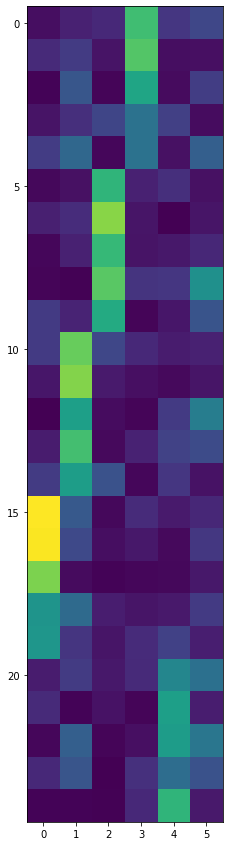

In [27]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

In [28]:
BFI_data_dropped.columns


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

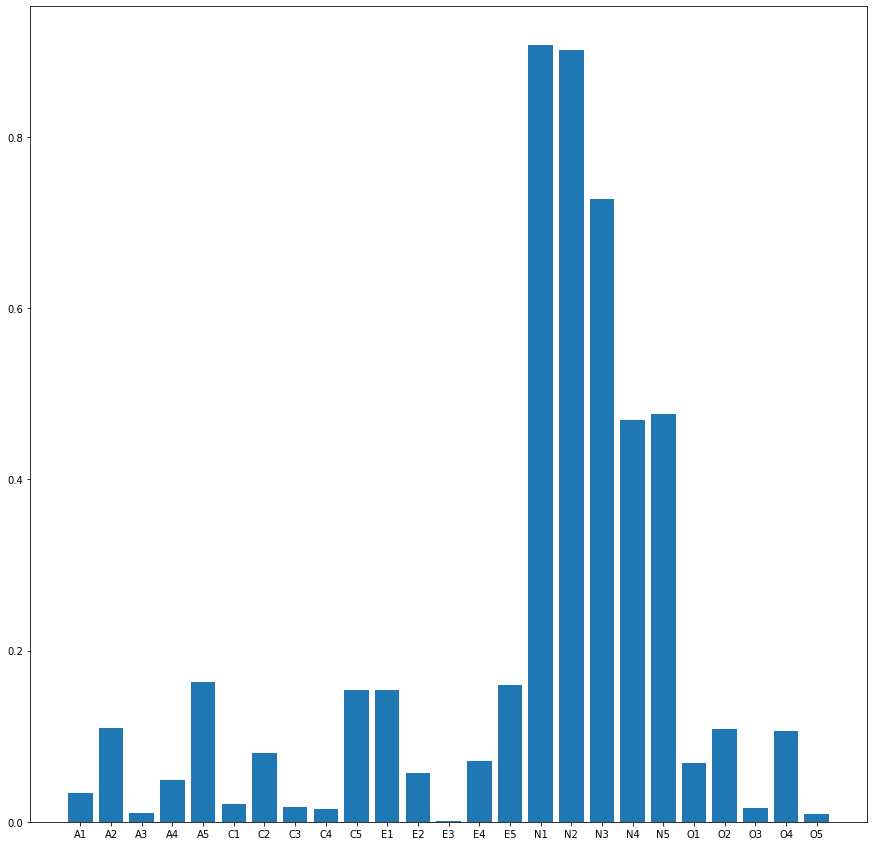

In [29]:

plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)


## **Exam 3**

ทำ Factor Analysis ข้อมูล Fifa 2018 